# Import

In [1]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split #split l'array into random train and test subsets

import tensorflow as tf
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Conv2D,Dense, Flatten, MaxPooling2D,Dropout
#from keras.Optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
from sklearn.utils import shuffle
import random 

from keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load and reshape Data

In [3]:
# load dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


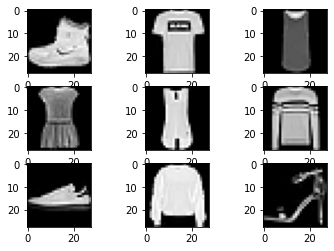

In [4]:
for i in range(0, 9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

In [5]:
#split 
X_valid, X_train, y_valid, y_train = train_test_split(X_train,y_train, train_size=1/12)

In [6]:
# reshape dataset to have a single channel
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_valid =X_valid.reshape(X_valid.shape[0],28,28,1)
# one hot encode target values
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)
y_valid = np_utils.to_categorical(y_valid,10)

In [7]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
print('val : X=%s, y=%s' % (X_valid.shape, y_valid.shape))

Train: X=(55000, 28, 28, 1), y=(55000, 10)
Test: X=(10000, 28, 28, 1), y=(10000, 10)
val : X=(5000, 28, 28, 1), y=(5000, 10)


In [8]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_valid = X_valid.astype('float32')

# normalize to range 0-1
X_train= X_train / 255.0
X_test = X_test / 255.0
X_valid= X_valid / 255.0

# I think that the validaiton is missing ?

# Define CNN Model LeNet


In [9]:
# define cnn model LeNet
def define_model():
  model = Sequential()
  model.add(Conv2D(64, (5, 5), activation='relu', input_shape=X_train.shape[1:]))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(32, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(10, activation='softmax'))
	# compile model
  # ADAM 0.001 / 0.0001
  #opt = SGD(learning_rate=0.01, momentum=0.9)
  opt=tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
  model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
  return model

In [10]:
X_train.shape

(55000, 28, 28, 1)

# Train model with and without EarlyStopping


*   With EarlyStopping 
        Model score : 91.54%
        Model error rate : 8.46%
*   Without EarlyStopping
        Model score : 91.80%
        Model error rate : 8.20%



In [11]:
#Train model avec un lot de 128 échantillons
filepath='model_FMNIST_WithoutES_CNN.h5'
model=define_model()
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath, save_weights_only=True, monitor='val_accuracy',mode='max',save_best_only=True)
history_non_aug=model.fit(X_train,y_train, epochs=100,batch_size=64, validation_data=(X_valid, y_valid),callbacks=[model_checkpoint_callback], verbose=2) #callback va être executé a chaque epoque d'apprentissage

# We can avoid to use the early stopping callback in our process
# Evaluate the model with and without EarlyStop callback


Epoch 1/100
860/860 - 34s - loss: 0.9903 - accuracy: 0.6390 - val_loss: 0.6270 - val_accuracy: 0.7622
Epoch 2/100
860/860 - 4s - loss: 0.5845 - accuracy: 0.7811 - val_loss: 0.5389 - val_accuracy: 0.8012
Epoch 3/100
860/860 - 4s - loss: 0.5181 - accuracy: 0.8082 - val_loss: 0.4917 - val_accuracy: 0.8212
Epoch 4/100
860/860 - 4s - loss: 0.4776 - accuracy: 0.8267 - val_loss: 0.4630 - val_accuracy: 0.8348
Epoch 5/100
860/860 - 4s - loss: 0.4462 - accuracy: 0.8399 - val_loss: 0.4404 - val_accuracy: 0.8442
Epoch 6/100
860/860 - 4s - loss: 0.4229 - accuracy: 0.8479 - val_loss: 0.4139 - val_accuracy: 0.8522
Epoch 7/100
860/860 - 4s - loss: 0.4041 - accuracy: 0.8561 - val_loss: 0.3977 - val_accuracy: 0.8570
Epoch 8/100
860/860 - 4s - loss: 0.3878 - accuracy: 0.8615 - val_loss: 0.3981 - val_accuracy: 0.8562
Epoch 9/100
860/860 - 4s - loss: 0.3738 - accuracy: 0.8658 - val_loss: 0.3805 - val_accuracy: 0.8668
Epoch 10/100
860/860 - 4s - loss: 0.3628 - accuracy: 0.8709 - val_loss: 0.3728 - val_accur

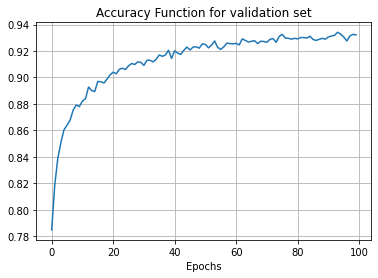

In [ ]:
plt.figure()
plt.plot(history_non_aug.history['val_accuracy'])
plt.title('Accuracy Function for validation set')
plt.xlabel('Epochs')
plt.grid()
plt.show()

In [12]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Model score : %.2f%%" % (scores[1]*100))
print("Model error rate : %.2f%%" % (100-scores[1]*100))

Model score : 91.77%
Model error rate : 8.23%



**With EarlyStopping**



In [ ]:
#With EarlyStopping
filepath='model_FMNIST_WithEstop_CNN.h5'
model=define_model()
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath, save_weights_only=True, monitor='val_accuracy',mode='max',save_best_only=True)
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=5,restore_best_weights=True)
history_non_aug=model.fit(X_train,y_train, epochs=100,batch_size=64, validation_data=(X_valid, y_valid),callbacks=[model_checkpoint_callback,earlyStopping], verbose=2) #callback va être executé a chaque epoque d'apprentissage


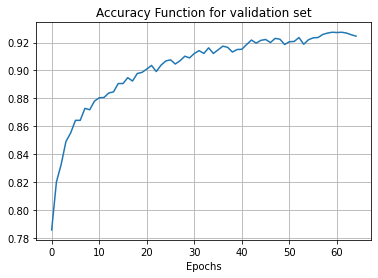

In [ ]:
plt.figure()
plt.plot(history_non_aug.history['val_accuracy'])
plt.title('Accuracy Function for validation set')
plt.xlabel('Epochs')
plt.grid()
plt.show()

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Model score : %.2f%%" % (scores[1]*100))
print("Model error rate : %.2f%%" % (100-scores[1]*100))

Model score : 91.54%
Model error rate : 8.46%


# Test Model



*   With EarlyStopping
> Restored model, accurancy: 91.54%, loss:  8.46%
*   Without EarlyStopping
> Restored model, accurancy: 91.82%, loss:  8.18%


In [ ]:
modelTest=define_model()
scores=modelTest.evaluate(X_test,y_test,verbose=0)
print("untrained model, accurancy: {:5.2f}%, loss: {:5.2f}%".format(100*scores[1],100-scores[1]*100))

untrained model, accurancy: 10.06%, loss: 89.94%


In [ ]:
modelTest.load_weights('model_FMNIST_WithoutES_CNN.h5')
scores=modelTest.evaluate(X_test,y_test,verbose=0)
print("Restored model, accurancy: {:5.2f}%, loss: {:5.2f}%".format(100*scores[1],100-scores[1]*100))

Restored model, accurancy: 91.82%, loss:  8.18%


In [ ]:
#******** With early stopping *********#
modelTest=define_model()
scores=modelTest.evaluate(X_test,y_test,verbose=0)
print("untrained model, accurancy: {:5.2f}%, loss: {:5.2f}%".format(100*scores[1],100-scores[1]*100))


untrained model, accurancy:  9.93%, loss: 90.07%


In [ ]:
modelTest.load_weights('model_FMNIST_WithEstop_CNN.h5')
scores=modelTest.evaluate(X_test,y_test,verbose=0)
print("Restored model, accurancy: {:5.2f}%, loss: {:5.2f}%".format(100*scores[1],100-scores[1]*100))

Restored model, accurancy: 91.54%, loss:  8.46%


# Data augmentation

# Flip



*   Flip Horizontale


> Model  Flip_H  score : 91.04%


> Model  Flip_H  error rate : 8.96%

*   Flip Verticale

      Model  Flip_V  score : 91.86%
      
      Model  Flip_V  error rate : 8.14%







***Flip horizontalement*** 

In [ ]:
# It is enough to perform data augmentation on training data
#### on concatene les labels(y) --> on associe l'image flipper avec la lettre correspondant
# X_train_flip_h -> (55000, 28, 28, 1)
# X_train -> (55000, 28, 28, 1)
# X_train_new -> (110000, 28, 28, 1)

In [13]:
def flip_h():
  name="Flip_H"
  X_train_flip_h = np.flip(X_train,1)
  X_train_new = np.concatenate([X_train, X_train_flip_h],axis=0)
  Y_trian_new = np.concatenate([y_train,y_train], axis=0)
  #Mélangez les tableaux ou les matrices éparses de manière cohérente.
  X_train_new, Y_trian_new = shuffle(X_train_new, Y_trian_new)
  return X_train_flip_h, X_train_new, Y_trian_new, name

In [13]:
X_train_flip_h, X_flipH_train_new, Y_flipH_trian_new,name = flip_h()

In [14]:
def affiche(X_train_flip_h):
  for i in range(0,9):
    plt.figure
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_flip_h[i].reshape(28,28),cmap=pyplot.get_cmap('gray'))
  # show the plot
  pyplot.show()

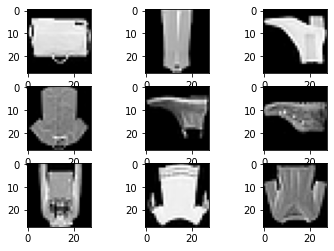

In [15]:
affiche(X_train_flip_h)

In [15]:
filepath='model_FMNIST_AugData_flipH_CNN.h5'
def train_model(X_train_new,Y_trian_new,filepath):
  model=define_model()
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath, save_weights_only=True, monitor='val_accuracy',mode='max',save_best_only=True)
  history_aug = model.fit(X_train_new, Y_trian_new, batch_size=64,validation_data=(X_valid,y_valid),epochs=50,callbacks=[model_checkpoint_callback], verbose=2)
  return model

In [ ]:
modelFlip=train_model(X_flipH_train_new,Y_flipH_train_new,filepath)

In [16]:
def evaluate_model(model,name):
  scores = model.evaluate(X_test, y_test, verbose=0)
  print("Model ",name," score : %.2f%%" % (scores[1]*100))
  print("Model ",name," error rate : %.2f%%" % (100-scores[1]*100))

In [ ]:
evaluate_model(modelFlip,name)

Model  Flip_H  score : 90.96%
Model  Flip_H  error rate : 9.04%


**Flip verticalement** 

In [17]:
def flip_v():
  name="Flip_V"
  X_train_flip_v = np.flip(X_train,2)
  X_train_new = np.concatenate([X_train, X_train_flip_v],axis=0)
  Y_trian_new = np.concatenate([y_train, y_train], axis=0)
  X_train_new, Y_trian_new = shuffle(X_train_new, Y_trian_new)
  return X_train_flip_v, X_train_new, Y_trian_new,name

In [19]:
X_train_flip_v, X_flipV_train_new, Y_flipV_trian_new , name=flip_v()

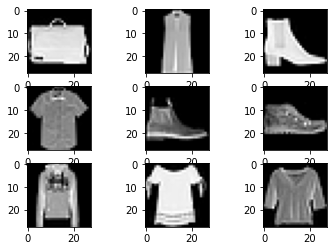

In [20]:
affiche(X_train_flip_v)

In [ ]:
filepath='model_FMNIST_AugData_flipV_CNN.h5'
model=train_model(X_flipV_train_new,Y_flipV_train_new,filepath)

In [ ]:
evaluate_model(model,name)

Model  Flip_V  score : 91.86%
Model  Flip_V  error rate : 8.14%


# Evaluation with the save model.load_weights

**Flip Horizontale**

Restored model, accurancy: 91.04%, loss: 8.96%

**Flip Verticale**

Restored model, accurancy: 91.86%, loss: 8.14%

**Evaluation with the save model.load_weights FlipH**

In [ ]:
modelTest=define_model()
scores=modelTest.evaluate(X_test,y_test,verbose=0)
print("untrained model, accurancy: {:5.2f}%, loss: {:5.2f}%".format(100*scores[1],100-scores[1]*100))

untrained model, accurancy:  9.71%, loss: 90.29%


In [ ]:
# evalaute also with the saved model. load_weights(.)
#loads the weights
modelTest.load_weights('model_FMNIST_AugData_flipH_CNN.h5')
scores=modelTest.evaluate(X_test,y_test,verbose=0)
print("Restored model, accurancy: {:5.2f}%, loss: {:5.2f}%".format(100*scores[1],100-scores[1]*100))

Restored model, accurancy: 91.04%, loss:  8.96%


**Evaluation with the save model.load_weights FlipV**

In [ ]:
modelTest=define_model()
scores=modelTest.evaluate(X_test,y_test,verbose=0)
print("untrained model, accurancy: {:5.2f}%, loss: {:5.2f}%".format(100*scores[1],100-scores[1]*100))

untrained model, accurancy: 10.00%, loss: 90.00%


In [ ]:
modelTest.load_weights('model_FMNIST_AugData_flipV_CNN.h5')
scores=modelTest.evaluate(X_test,y_test,verbose=0)
print("Restored model, accurancy: {:5.2f}%, loss: {:5.2f}%".format(100*scores[1],100-scores[1]*100))

Restored model, accurancy: 91.86%, loss:  8.14%


# Transpose

> Model  Transpose  score : 92.08%


> Model  Transpose  error rate : 7.92%



*   **Model.load_weights**


> untrained model, accurancy:  9.72%, loss: 90.28%


> Restored model, accurancy: 91.87%, loss:  8.13%









In [18]:
def transpose_funct():
  name="Transpose"
  X_train_transpose=np.transpose(X_train,(0,2,1,3))
  X_train_new = np.concatenate([X_train, X_train_transpose],axis=0)
  Y_trian_new = np.concatenate([y_train, y_train], axis=0)
  X_train_trans_new, Y_trian_trans_new = shuffle(X_train_new, Y_trian_new)
  return X_train_transpose, X_train_trans_new, Y_trian_trans_new, name

In [22]:
X_train_transpose,X_train_trans_new, Y_trian_trans_new, name=transpose_funct()

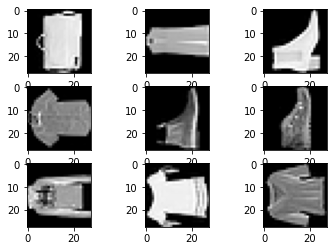

In [23]:
affiche(X_train_transpose)

In [ ]:
filepath='model_FMNIST_AugData_trans_CNN.h5'
model=train_model(X_train_trans_new,Y_trian_trans_new,filepath)

In [ ]:
evaluate_model(model,name)

Model  Transpose  score : 92.08%
Model  Transpose  error rate : 7.92%


**Evaluation with the save model.load_weights**


In [ ]:
modelTest=define_model()
scores=modelTest.evaluate(X_test,y_test,verbose=0)
print("untrained model, accurancy: {:5.2f}%, loss: {:5.2f}%".format(100*scores[1],100-scores[1]*100))

untrained model, accurancy:  9.72%, loss: 90.28%


In [ ]:
modelTest.load_weights('model_FMNIST_AugData_trans_CNN.h5')
scores=modelTest.evaluate(X_test,y_test,verbose=0)
print("Restored model, accurancy: {:5.2f}%, loss: {:5.2f}%".format(100*scores[1],100-scores[1]*100))

Restored model, accurancy: 91.87%, loss:  8.13%


# Gaussian Noise


*   **Gaussian Noise with sigma=0.05**

> Model  Gaussian_Noise  score : 91.79%

> Model  Gaussian_Noise  error rate : 8.21%




*   **Gaussian Noise with sigma=0.5**

> Model  Gaussian_Noise  score : 91.34%

> Model  Gaussian_Noise  error rate : 8.66%








In [19]:
#mu=1 Mean (“centre”) of the distribution

def gaussian_Noise(mu,sigma):
  name="Gaussian_Noise"
  gauss = np.random.normal(mu, sigma, size=X_train.shape)
  X_train_noisy = X_train * gauss
  X_train_new = np.concatenate([X_train, X_train_noisy],axis=0)
  Y_trian_new = np.concatenate([y_train, y_train], axis=0)
  X_train_new, Y_trian_new = shuffle(X_train_new, Y_trian_new)
  return  X_train_noisy,X_train_new, Y_trian_new, name

In [25]:
X_train_noisy, X_train_new, Y_trian_new, name=gaussian_Noise(1,0.05) 

In [ ]:
print(type(Y_trian_new))


<class 'numpy.ndarray'>


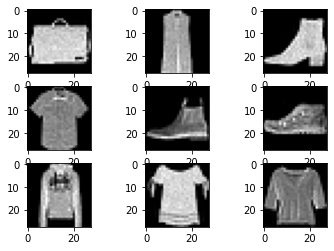

In [26]:
affiche(X_train_noisy)

In [ ]:
filepath='model_FMNIST_AugData_GNoise1_CNN.h5'
model=train_model(X_train_new,Y_trian_new,filepath)

In [ ]:
evaluate_model(model,name)

Model  Gaussian_Noise  score : 91.82%
Model  Gaussian_Noise  error rate : 8.18%


**En diminuant la noise**

In [ ]:
X_train_noisy, X_train_new, Y_trian_new, name=gaussian_Noise(1,0.5) 

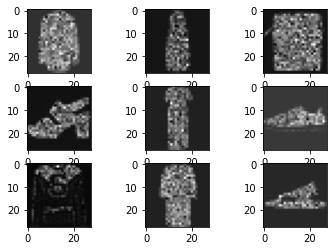

In [ ]:
affiche(X_train_noisy)

In [ ]:
filepath='model_FMNIST_AugData_GNoise2_CNN.h5'
model=train_model(X_train_new,Y_trian_new,filepath)

In [ ]:
evaluate_model(model,name)

Model  Gaussian_Noise  score : 91.34%
Model  Gaussian_Noise  error rate : 8.66%


**Load_weights**

In [ ]:
modelTest.load_weights('model_FMNIST_AugData_GNoise1_CNN.h5')
scores=modelTest.evaluate(X_test,y_test,verbose=0)
print("Restored model, accurancy: {:5.2f}%, loss: {:5.2f}%".format(100*scores[1],100-scores[1]*100))

Restored model, accurancy: 91.81%, loss:  8.19%


In [ ]:
modelTest.load_weights('model_FMNIST_AugData_GNoise2_CNN.h5')
scores=modelTest.evaluate(X_test,y_test,verbose=0)
print("Restored model, accurancy: {:5.2f}%, loss: {:5.2f}%".format(100*scores[1],100-scores[1]*100))

Restored model, accurancy: 91.11%, loss:  8.89%


# Random methode for Data augmentation 

In [20]:
tab=[flip_v(), flip_h(), transpose_funct(), gaussian_Noise(1,0.05)]
functionDataAug = random.choice(tab) #la methode
X_train_methode, X_Ran_train_new, Y_Ran_train_new, name=functionDataAug
name

'Gaussian_Noise'

In [23]:
filepath='RandomChoise.h5'
modelRand=train_model(X_Ran_train_new, Y_Ran_train_new, filepath)

Epoch 1/50
1719/1719 - 9s - loss: 0.7772 - accuracy: 0.7149 - val_loss: 0.5423 - val_accuracy: 0.8044
Epoch 2/50
1719/1719 - 8s - loss: 0.5066 - accuracy: 0.8154 - val_loss: 0.4712 - val_accuracy: 0.8324
Epoch 3/50
1719/1719 - 8s - loss: 0.4432 - accuracy: 0.8421 - val_loss: 0.4281 - val_accuracy: 0.8508
Epoch 4/50
1719/1719 - 8s - loss: 0.4004 - accuracy: 0.8557 - val_loss: 0.4040 - val_accuracy: 0.8574
Epoch 5/50
1719/1719 - 8s - loss: 0.3734 - accuracy: 0.8663 - val_loss: 0.3731 - val_accuracy: 0.8682
Epoch 6/50
1719/1719 - 8s - loss: 0.3525 - accuracy: 0.8734 - val_loss: 0.3545 - val_accuracy: 0.8718
Epoch 7/50
1719/1719 - 8s - loss: 0.3351 - accuracy: 0.8787 - val_loss: 0.3501 - val_accuracy: 0.8740
Epoch 8/50
1719/1719 - 8s - loss: 0.3241 - accuracy: 0.8826 - val_loss: 0.3318 - val_accuracy: 0.8806
Epoch 9/50
1719/1719 - 8s - loss: 0.3111 - accuracy: 0.8872 - val_loss: 0.3236 - val_accuracy: 0.8818
Epoch 10/50
1719/1719 - 8s - loss: 0.3032 - accuracy: 0.8885 - val_loss: 0.3121 - 

In [24]:
evaluate_model(modelRand,name)

Model  Gaussian_Noise  score : 91.81%
Model  Gaussian_Noise  error rate : 8.19%


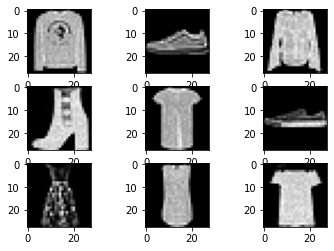

In [25]:
affiche(X_train_methode)

# With ImageDataGenerator

In [ ]:
#Un générateur d’images augmentées
datagen = ImageDataGenerator(
    shear_range =45. ,
    horizontal_flip=True,
    rotation_range =25,
    width_shift_range= 3/32,
    height_shift_range= 3/32,
    )

In [ ]:
# train the network
filepath='model_FMNIST_Function_AugData_CNN.h5'
model=define_model()
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath, save_weights_only=True, monitor='val_accuracy',mode='max',save_best_only=True)
#earlyStopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=5,restore_best_weights=True)

history_aug = model.fit(datagen.flow(X_train, y_train, batch_size=32),validation_data=(X_valid, y_valid),
epochs=50,callbacks=[model_checkpoint_callback], verbose=2)

In [ ]:
#retourne des lot d'échantillons
#datagen.fit(X_train)

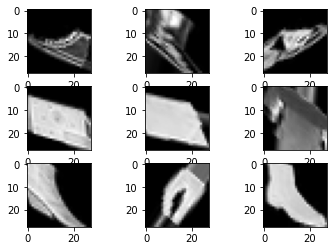

In [ ]:
#X_batch, y_batch = datagen.flow(train, train, batch_size=32)

for X_batch, y_batch in datagen.flow(X_train, y_train,batch_size=32):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [ ]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_valid = np.asarray(X_valid)
y_valid = np.asarray(y_valid)


In [ ]:
score = model.evaluate(X_test,y_test, batch_size=20)
print("Test lost: %.2f%%"%(score[0]*100))# Le premier élément de scores renvoie la fonction de coût sur la
print("Test accuracy: %.2f%%"%(score[1]*100))# renvoie le taux de bonne détection (accuracy)

500/500 [==============================] - 1s 2ms/step - loss: 0.6140 - accuracy: 0.7656
Test lost: 61.40%
Test accuracy: 76.56%


**Comparaison**

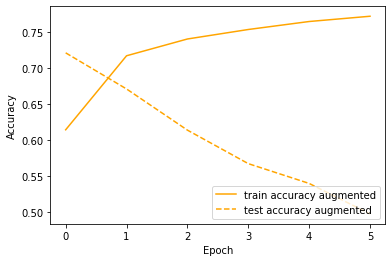

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(history_aug.history['accuracy'],
         label='train accuracy augmented',
         c='orange', ls='-')
plt.plot(history_aug.history['val_accuracy'],
         label='test accuracy augmented',
         c='orange',ls='--')



plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

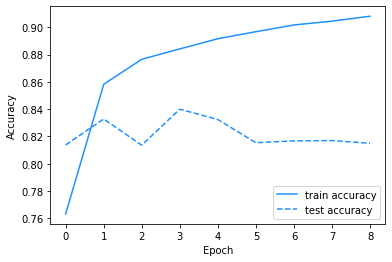

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(history_non_aug.history['accuracy'],
         label='train accuracy',
         c='dodgerblue', ls='-')
plt.plot(history_non_aug.history['val_accuracy'],
         label='test accuracy',
         c='dodgerblue', ls='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()